# Fresh/Deseased Cotton Leaf/Plant Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying Fresh/Deseased Cotton Leaf/Plant images. Data Divided into three folder:

Training
Validation
Test Each Directory containing four sub-directory(target) named as:
deseased cotton leaf
deseased cotton plant
fresh cotton leaf
fresh cotton plant Data Statistics:
Training: 288 - 815 - 427 - 421
Validation: 55 - 101 - 80 - 88
Test: 3 - 5 - 5 - 5
### Dependencies
* Jupyter notebook
* Tensorflow 1.10
* Python 3.6
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://conda.io/docs/)

Train Covolutional Neural Network Model (which designed by own) on Training set and validate it on validation set, Once the model performance on validation data is good, then test it on test dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x) #final layer with softmax activation

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
# model architecture
for i,layer in enumerate(model.layers):
  print(i,layer.name)


0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
#Now lets load the training data into the ImageDataGenerator. 
#Specify path, and it automatically sends the data for training in batches, simplifying the code.


for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


## Data Augmentation
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/machine_learning/data/train',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='categorical')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/machine_learning/data/val',
                                           target_size=(224,224),
                                           batch_size = 16,
                                           class_mode='categorical',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/gdrive/MyDrive/machine_learning/data/test',
                                            target_size=(224,224),
                                            batch_size=16,
                                            shuffle=False)



Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
Found 36 images belonging to 5 classes.


In [ ]:
filepath = '/content/gdrive/MyDrive/machine_learning/leaf_model/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_set.n//train_set.batch_size
model.fit_generator(generator=train_set,
                   steps_per_epoch=step_size_train,
                   validation_data = test_set,
                   epochs=20,callbacks=callbacks)



Epoch 1/20
121/121 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8780
Epoch 00001: val_loss improved from inf to 1.83546, saving model to /content/gdrive/MyDrive/machine_learning/leaf_model/my_best_model.epoch01-loss1.84.hdf5
121/121 [==============================] - 385s 3s/step - loss: 0.3985 - accuracy: 0.8780 - val_loss: 1.8355 - val_accuracy: 0.6451
Epoch 2/20
121/121 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9478
Epoch 00002: val_loss did not improve from 1.83546
121/121 [==============================] - 47s 386ms/step - loss: 0.2006 - accuracy: 0.9478 - val_loss: 3.2593 - val_accuracy: 0.6111
Epoch 3/20
121/121 [==============================] - ETA: 0s - loss: 0.2392 - accuracy: 0.9349
Epoch 00003: val_loss improved from 1.83546 to 1.26775, saving model to /content/gdrive/MyDrive/machine_learning/leaf_model/my_best_model.epoch03-loss1.27.hdf5
121/121 [==============================] - 48s 400ms/step - loss: 0.2392 - accu

In [ ]:
from tensorflow.keras.models import load_model
final_model = load_model('/content/gdrive/MyDrive/machine_learning/leaf_model/my_best_model.epoch12-loss0.03.hdf5')

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('/content/gdrive/MyDrive/machine_learning/leaf_model/cotton_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpput8jn08/assets


model converted


In [ ]:
import tensorflow as tf


def run_tflite_model(tflite_file, test_image):

    interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
    interpreter.allocate_tensors()
    print(interpreter.get_input_details())
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    interpreter.set_tensor(input_details["shape_signature"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    prediction = output.argmax()

    return prediction

img_path =  '/content/gdrive/MyDrive/machine_learning/data/test/diseased cotton plant/dd (367).jpg'
model_path = '/content/gdrive/MyDrive/machine_learning/leaf_model/cotton_model.tflite'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img = np.array(img, dtype="float32")
img = np.reshape(img, (1,224,224,3))
prediction = run_tflite_model(model_path,img)

In [ ]:
np.argmax(prediction)

1

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing import image
img_path =  '/content/gdrive/MyDrive/machine_learning/data/test/diseased cotton plant/dd (367).jpg'
#img = cv2.imread("dog.jpeg")
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.array(img_tensor, dtype="float32")
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.


# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/gdrive/MyDrive/machine_learning/leaf_model/cotton_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

#print("*"*50, input_details)
interpreter.set_tensor(input_details[0]['index'], img_tensor)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

In [ ]:
img_tensor.shape

(1, 224, 224, 3)

In [ ]:
input_details[0]['index']

0

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
input_image =  '/content/gdrive/MyDrive/machine_learning/data/test/diseased cotton plant/dd (367).jpg'
#new_image = load_image(img_path)

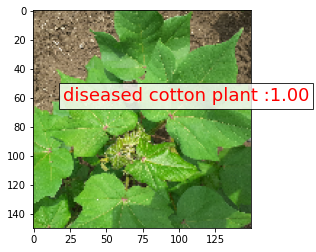

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(input_image, target_size=(150, 150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = final_model.predict(img, batch_size=None,steps=1) #gives all class prob.
prrd = np.argmax(prediction)
prediction = prediction[0] 
if prrd == 0:
    value ='diseased cotton leaf :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 1:
    value ='diseased cotton plant :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 2:
    value ='fresh cotton leaf :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 3:
    value ='fresh cotton plant :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

#plt.figure(figsize=(15, 20))
plt.imshow(img1)
plt.show()


In [ ]:
import pandas as pd
test_set.reset
ytesthat = final_model.predict_generator(test_set)
test_predict = [np.argmax(i) for i in ytesthat]
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':test_predict,
    'y':test_set.classes
})

In [ ]:
df.sample(20)

,filename,predict,y
289,fresh cotton plant/dsd (435)_iaip.jpg,3,3
301,fresh cotton plant/dsd (503)_iaip.jpg,3,3
61,diseased cotton plant/dd (134)_iaip.jpg,1,1
101,diseased cotton plant/dd (40)_iaip.jpg,1,1
134,diseased cotton plant/dd (741)_iaip.jpg,1,1
135,diseased cotton plant/dd (759)_iaip.jpg,1,1
246,fresh cotton plant/dsd (180)_iaip.jpg,3,3
141,diseased cotton plant/dd (804)_iaip.jpg,1,1
125,diseased cotton plant/dd (658)_iaip.jpg,1,1
28,diseased cotton leaf/dis_leaf (265)_iaip.jpg,0,0


In [ ]:
# test accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
y_predd = df['predict'].tolist()
y_testt = df['y'].tolist()
print('f1 score: ',f1_score(y_testt, y_predd, average="macro"))
print('precision score: ',precision_score(y_testt, y_predd, average="macro"))
print('recall score: ',recall_score(y_testt, y_predd, average="macro")) 
print('accuraccy score: ',accuracy_score(y_testt, y_predd)) 

f1 score:  0.9870205566905004
precision score:  0.98677398989899
recall score:  0.9873790504050406
accuraccy score:  0.9876543209876543


In [ ]:
misclassified = df[df['y']!=df['predict']]
print('Total misclassified image from 324 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 324 Validation images : 4


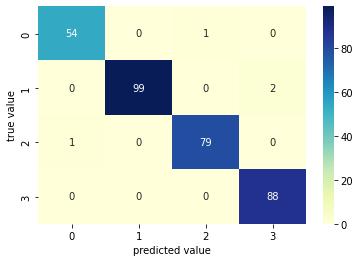

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.predict)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
import tensorflow as tf
converter=tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpahf7ghgi/assets


In [ ]:
open("/content/gdrive/MyDrive/machine_learning/leaf_model/best_model12.tflite", "wb").write(tflite_model)

23305112

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/gdrive/MyDrive/machine_learning/cottonleaf_model_bak.h5')

### Prediction of Single Image

In [ ]:
input_image =  '/content/gdrive/MyDrive/machine_learning/data/test/diseased cotton plant/dd (328).jpg'

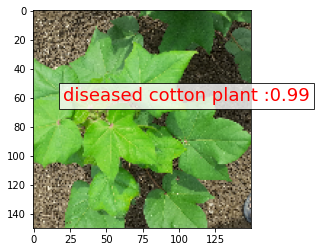

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(input_image, target_size=(150, 150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
prrd = np.argmax(prediction)
prediction = prediction[0] 
if prrd == 0:
    value ='diseased cotton leaf :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 1:
    value ='diseased cotton plant :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 2:
    value ='fresh cotton leaf :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif prrd == 3:
    value ='fresh cotton plant :%1.2f'%(max(prediction))
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))


plt.imshow(img1)
plt.show()


In [ ]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
test_predict = [np.argmax(i) for i in ytesthat]
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':test_predict,
    'y':test_set.classes
})

In [ ]:
df.shape

(324, 3)

In [ ]:
df.sample(20)

,filename,predict,y
153,diseased cotton plant/dd (895)_iaip.jpg,1,1
261,fresh cotton plant/dsd (262)_iaip.jpg,3,3
217,fresh cotton leaf/d (435)_iaip.jpg,2,2
254,fresh cotton plant/dsd (221)_iaip.jpg,3,3
107,diseased cotton plant/dd (466)_iaip.jpg,1,1
88,diseased cotton plant/dd (303)_iaip.jpg,1,1
191,fresh cotton leaf/d (291)_iaip.jpg,2,2
136,diseased cotton plant/dd (765)_iaip.jpg,3,1
73,diseased cotton plant/dd (208)_iaip.jpg,1,1
52,diseased cotton leaf/dis_leaf (85)_iaip.jpg,0,0


In [ ]:
# test accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
y_predd = df['predict'].tolist()
y_testt = df['y'].tolist()
print('f1 score: ',f1_score(y_testt, y_predd, average="macro"))
print('precision score: ',precision_score(y_testt, y_predd, average="macro"))
print('recall score: ',recall_score(y_testt, y_predd, average="macro")) 
print('accuraccy score: ',accuracy_score(y_testt, y_predd)) 

f1 score:  0.8982276693645551
precision score:  0.9125807102502018
recall score:  0.8891257875787578
accuraccy score:  0.8888888888888888


In [ ]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
#df['y_pred'] = df['predict']>0.5
#df.y_pred = df.y_pred.astype(int)
#df.head(10)

In [ ]:
misclassified = df[df['y']!=df['predict']]
print('Total misclassified image from 324 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 324 Validation images : 36


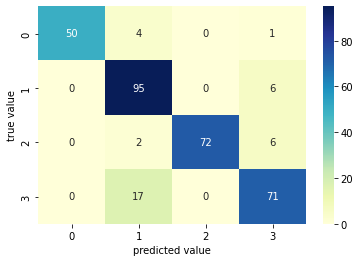

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.predict)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
CatasDog

4      diseased cotton leaf/dis_leaf (12)_iaip.jpg
9     diseased cotton leaf/dis_leaf (153)_iaip.jpg
36    diseased cotton leaf/dis_leaf (309)_iaip.jpg
50     diseased cotton leaf/dis_leaf (71)_iaip.jpg
Name: filename, dtype: object

IndexError: ignored

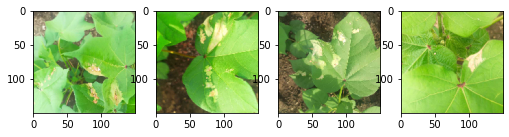

In [ ]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.predict==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 2
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/gdrive/MyDrive/machine_learning/data/val/'+CatasDog.iloc[i], target_size=(150,150))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()


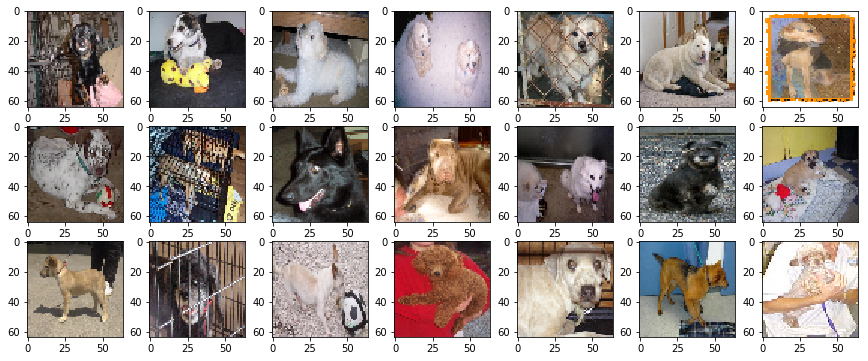

In [ ]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()


In [ ]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total para

### Visualization of Layers Ouptut


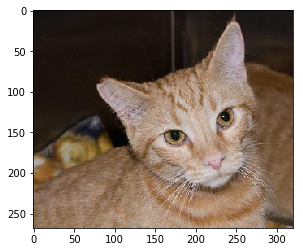

In [ ]:
#Input Image for Layer visualization
img1 = image.load_img('test/Cat/14.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('test/Cat/14.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [ ]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


In [ ]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [ ]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


### Single Convolution Filter Output

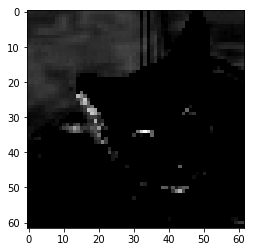

In [ ]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

### First Covolution Layer Output

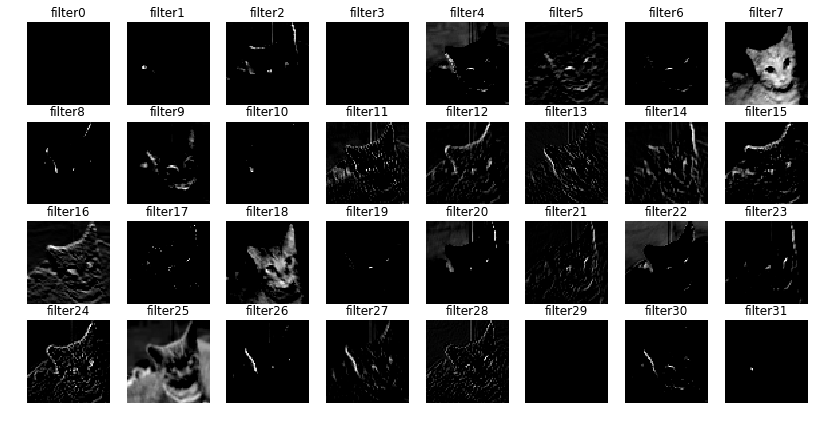

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

### Second Covolution Layer Output

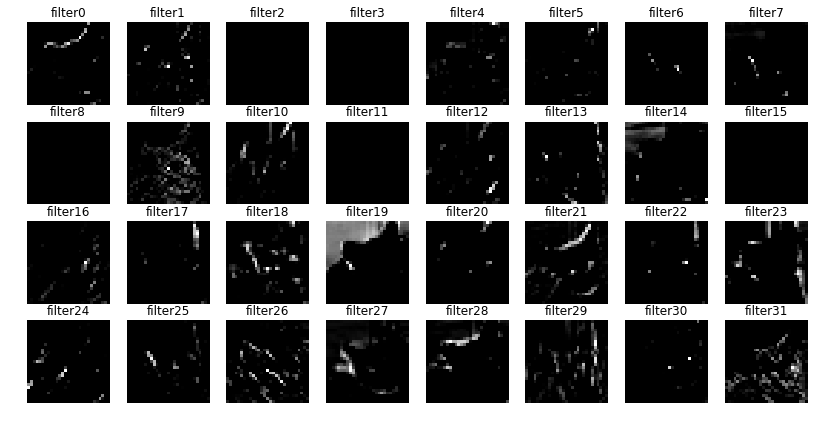

In [ ]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

### Model Performance on Unseen Data

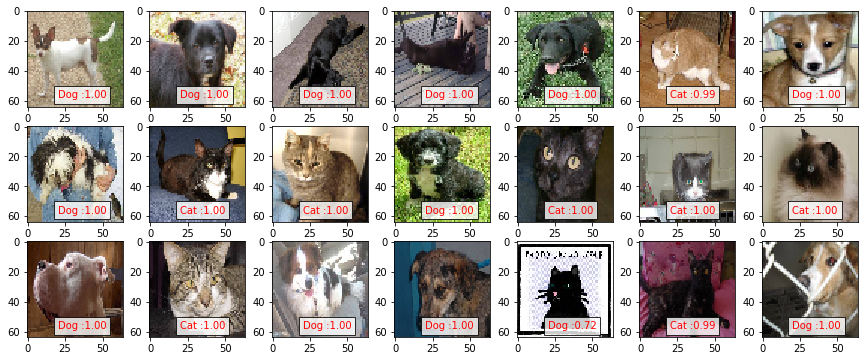

In [ ]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('test1/'+test_set1.filenames[np.random.choice(range(12500))], target_size=(150,150))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


In [ ]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 99.96%     Training loss  : 0.002454
Validation Accuracy: 97.56%     Validation loss: 0.102678


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **97.56%** on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training. You can download this trained model from resource directory and Play with it. 